## Loading Word Pair Dictionary as WP

In [2]:
#Old way of loading WP file
'''
# LOADING WP
import numpy as np
WP_txt = open("/Users/TaraD/LING_Research/WPdict_COCA_txt.txt", 'r')
WP = WP_txt.read().split('\n\n')
print(np.shape(WP))
'''

(34326003,)


In [214]:
#Old way of making WP_dict
'''
WP_txt.close()
t0 = time.time()
# MAKING WP INTO DICTIONARY 
print(type(WP))
WP_txtdict = {}
for i in range(len(WP[:-1])):
    line = WP[i]
    if i%1000000==0:
        print(i)
    #print(line)
    k,v = line.strip().split(' : ')
    WP_txtdict[k.strip().upper()] = float(v.strip())
print(time.time()-t0)
#print(WP_dict[:100])
'''

<class 'list'>
0
1000000
2000000
3000000
4000000
5000000
6000000
7000000
8000000
9000000
10000000
11000000
12000000
13000000
14000000
15000000
16000000
17000000
18000000
19000000
20000000
21000000
22000000
23000000
24000000
25000000
26000000
27000000
28000000
29000000
30000000
31000000
32000000
33000000
34000000
893.4898071289062


In [1]:
print('apples')

apples


In [1]:
#USE THIS # LOADING WP AS WP_DICT
import pickle as pickle
with open('WPdict_COCA_pkl.pkl','rb') as fp:
    WP_dict = pickle.load(fp)
print(type(WP_dict)) #replace with 

<class 'dict'>


In [2]:
# CHECKING DICT ETC
#WP_txtdict = WP_dict
#WP_dict = data1
#print(WP_dict['AFTERNOON,IN'])
#print(len(WP_txtdict))
#print(WP_txtdict['KEPT,MY'])
print(len(WP_dict))
#data2 = data1.upper()
print(WP_dict['kept,my'])

34326002
893


## Loading CMU and making dictionary

In [3]:
import numpy as np
# LOADING CMU DATA AND MAKING DICTIONARY
file = open("/Users/TaraD/LING_Research/cmudict-updated-plotnik.dict", 'r')
#print(file.readlines())
data = file.read().splitlines()
data = np.array(data)
print(np.shape(data))
#print((data))
pron = []
for i in range(len(data[:])):
    sep = (data[i]).split(' ',1)
    pron.append(sep)
#print(np.array(pron))
file.close()
print(np.shape(pron))
print(pron[:10])

CMU_dict = {}
count = 0
for line in pron[:]:
    #print(line)
    k,v = line[0],line[1]
    if k not in CMU_dict:
        CMU_dict[k] = v
        count +=1
    elif k in CMU_dict:
        CMU_dict[k] = CMU_dict[k]+','+v
        count+=1
        
print("done",len(CMU_dict))
#print(CMU_dict)
print(count)
print(CMU_dict['WAS'])

(64037,)
(64037, 2)
[["'CAUSE", 'K @.0 Z'], ["'COURSE", 'K owr.1 R S'], ["'END-INNER-QUOTE", 'e.1 N D i.1 N *hr.0 K W ow.1 T'], ["'END-QUOTE", 'e.1 N D K W ow.1 T'], ["'INNER-QUOTE", 'i.1 N *hr.0 K W ow.1 T'], ["'M", '@.0 M'], ["'N", '@.0 N'], ["'QUOTE", 'K W ow.1 T'], ["'SINGLE-QUOTE", 'S i.1 NG G @.0 L K W ow.1 T A @.0'], ['A', '@.0']]
done 59518
64037
W o.1 Z,W @.0 Z,W uh.1 Z


In [134]:
'''
#TESTING MAKING ARRAY BEFORE WP_CMU CODE
import time as time

t0 = time.time()
print('starting')
WP_array = [x.strip().split(' : ') for x in WP[:]]
WP_array = np.array(WP_array)
print(WP_array[:10])
print(time.time() - t0)
'''

starting
[list(['afternoon,in', '1328']) list(['in,late', '7779'])
 list(['late,july', '474']) list(['the,children', '22842'])
 list(['children,were', '5057']) list(['were,angry', '350'])
 list(['angry,because', '310']) list(['because,while', '330'])
 list(['while,they', '6175']) list(['they,worked', '1745'])]
14321.058356046677


In [153]:
'''
#WP_array = WP_array[:-1]
#for i in range(len(WP_array)):
 #   line = WP_array[i]
  #  if len(line) != 2:
   #     print(i,line)
#print(len(WP_array))
#print(WP[-5:])
for i in range(34326000,len(WP[:])):
    #if WP[i]== ' ':
    print(i, WP[i])
'''

34326000 eagles',14-13 : 1
34326001 to,channelview. : 1
34326002 


## Dict Method: Making TP_dict

In [4]:
import time as time
t0 = time.time()
TP_dict = {}
H_dict = {}
Dict = WP_dict
num = 0
for key in Dict:
    if num%10000==0:
        print(num, time.time()-t0)
    if num == 2000000:
        break
    num+=1
    
    wp_list = key.split(',')
    count = Dict[key]
    word1 = wp_list[0].upper()
    word2 = wp_list[1].upper()
    if word1 in CMU_dict and word2 in CMU_dict:
        trans_list1 = CMU_dict[word1].split(',')
        trans_list2 = CMU_dict[word2].split(',')
    else:
        continue
    for i in range(len(trans_list1)):
            for j in range(len(trans_list2)):
                trans1 = trans_list1[i]
                trans2 = trans_list2[j]
                tp = trans1+','+trans2
                info = key + ':' + str(count)
                if tp in TP_dict:
                    if H_dict[tp] !=  info: #dealing with random double like "kept" in cmu
                        TP_dict[tp] = TP_dict[tp]+count
                        H_dict[tp] = H_dict[tp]+ ';' + info
                else:
                    TP_dict[tp] = count
                    H_dict[tp] = key + ':' + str(count)
print(len(TP_dict),len(H_dict))
#print(TP_dict)
import pickle as pickle
with open('TP_dict.pkl','wb') as fp:
    pickle.dump(TP_dict,fp)
with open('H_dict.pkl','wb') as fp2:
    pickle.dump(H_dict,fp2)

0 0.007891178131103516
10000 8.535269021987915
20000 9.876574754714966
30000 10.868474960327148
40000 12.296245813369751
50000 15.736891031265259
60000 18.79149293899536
70000 20.40576410293579
80000 21.953843116760254
90000 23.161162853240967
100000 24.233662128448486
110000 25.818800926208496
120000 27.30781602859497
130000 28.554664850234985
140000 29.853990077972412
150000 30.67102599143982
160000 31.522608041763306
170000 32.55336093902588
180000 33.10262203216553
190000 33.58776593208313
200000 34.14858889579773
210000 34.59893488883972
220000 35.85016894340515
230000 36.328612089157104
240000 36.80224800109863
250000 37.186988830566406
260000 37.7167489528656
270000 38.07490396499634
280000 38.455540895462036
290000 38.79931592941284
300000 39.14096808433533
310000 39.530977964401245
320000 39.84672403335571
330000 40.34404706954956
340000 40.742185831069946
350000 41.054096937179565
360000 41.333491802215576
370000 41.63999700546265
380000 42.02576804161072
390000 42.2859239578

In [5]:
tp = 'ae.1 N D,DH eyr.1 R'
print(TP_dict[tp]) #'F *hr.0' 'eyF.1'
print(H_dict[tp])
#import pickle as pickle
#with open('TP_dict.pkl','wb') as fp:
#    pickle.dump(TP_dict,fp)
#with open('H_dict.pkl','wb') as fp2:
#    pickle.dump(H_dict,fp2)

109809
and,there:42878;and,they're:14338;and,their:52593


In [6]:
with open('TP_dict.pkl','rb') as fp3:
    TP_dict1 = pickle.load(fp3)
with open('H_dict.pkl','rb') as fp4:
    H_dict1 = pickle.load(fp4)
print(type(TP_dict1),type(H_dict1))
tp = 'ae.1 N D,DH eyr.1 R'
print(TP_dict1[tp]) #'F *hr.0' 'eyF.1'
print(H_dict1[tp])

<class 'dict'> <class 'dict'>
109809
and,there:42878;and,they're:14338;and,their:52593


In [12]:
tp = 'aw.1 T,W uh.1 Z'
#tp='ey.1 T,W @.0 Z'
print(TP_dict1[tp]) #'F *hr.0' 'eyF.1'
print(H_dict1[tp])

755
out,was:755


V= ['owr', 'e', 'i', 'ow', 'eyF', 'ay0', 'ey', 'o', 'ae', 'uh', 'oh', 'ahr', 'iy', 'aeh', 'ay', 'Tuw', 'aeBR', 'aw', '*hr', 'uw', 'eyr', 'owL', 'uwr', 'owF', 'iyr', 'oy', 'u', 'ah', 'uwL']
Ntot= 708820218 2.103996992111206
vi= i
vi i
1 trans1= ae.2 F T *hr.0 N Tuw.1 N trans2= @.0 N
2 trans1= ae.2 F T *hr.0 N Tuw.1 N trans2= i.1 N
3 trans1= @.0 N trans2= L ey.1 T
4 trans1= i.1 N trans2= L ey.1 T
j 0 owr trans_vj= owr.1 N
j 1 e trans_vj= e.1 N
j 2 ow trans_vj= ow.1 N
j 3 eyF trans_vj= eyF.1 N
j 4 ay0 trans_vj= ay0.1 N
j 5 ey trans_vj= ey.1 N
j 6 o trans_vj= o.1 N
j 7 ae trans_vj= ae.1 N
j 8 uh trans_vj= uh.1 N
j 9 oh trans_vj= oh.1 N
MUTATION FOUND oh.1 N,L ey.1 T 190
j 10 ahr trans_vj= ahr.1 N
j 11 iy trans_vj= iy.1 N
j 12 aeh trans_vj= aeh.1 N
j 13 ay trans_vj= ay.1 N
j 14 Tuw trans_vj= Tuw.1 N
j 15 aeBR trans_vj= aeBR.1 N
j 16 aw trans_vj= aw.1 N
j 17 *hr trans_vj= *hr.1 N
j 18 uw trans_vj= uw.1 N
j 19 eyr trans_vj= eyr.1 N
j 20 owL trans_vj= owL.1 N
j 21 uwr trans_vj= uwr.1 N
j 22 ow

87 trans1= W uh.1 Z trans2= DH eyF.1
88 trans1= T @.0 trans2= T oh.1 K
89 trans1= T i.0 trans2= T oh.1 K
90 trans1= T Tuw.1 trans2= T oh.1 K
91 trans1= T oh.1 K trans2= T @.0
92 trans1= T oh.1 K trans2= T i.0
93 trans1= T oh.1 K trans2= T Tuw.1
94 trans1= T @.0 trans2= DH @.0
95 trans1= T @.0 trans2= DH uh.1
96 trans1= T @.0 trans2= DH iy.0
97 trans1= T i.0 trans2= DH @.0
98 trans1= T i.0 trans2= DH uh.1
99 trans1= T i.0 trans2= DH iy.0
100 trans1= T Tuw.1 trans2= DH @.0
Confusability After =  [0.00000000e+00 0.00000000e+00 2.87521451e-09 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00]
time= 2.362612009048462


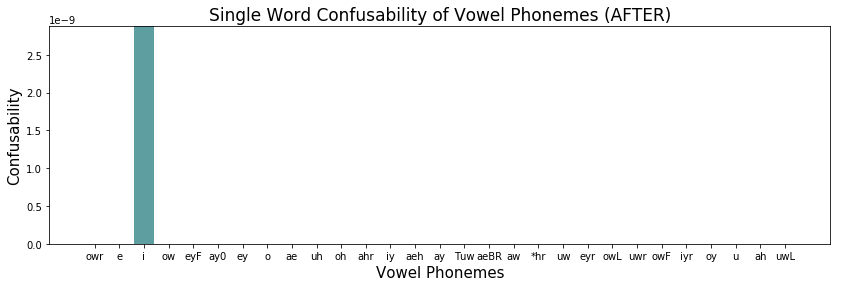

In [10]:
# NEW DICT VERSION: CONFUSABILITY FULL AFTER

t0 = time.time()

V = ['owr', 'e', 'i', 'ow', 'eyF', 'ay0', 'ey', 'o', 'ae', 'uh', 'oh', 'ahr', 'iy', 'aeh', 'ay', 'Tuw', 'aeBR', 'aw', '*hr', 'uw', 'eyr', 'owL', 'uwr', 'owF', 'iyr', 'oy', 'u', 'ah', 'uwL']
C_full_after = np.zeros((len(V))) # Confusability Matrix
print("V=",V)

# CALCULATING NTOT
Ntot=0
for tp in TP_dict1:
    Ntp = TP_dict1[tp] #float(WP_CMU1[i,2])
    Ntot += Ntp
print("Ntot=", Ntot, time.time()-t0)

# CONFUSABILITY CALCULATION
for i in range(2,3):#(len(V[:])):
    vi = V[i]
    print("vi=",vi)
    vi_1 = ' ' + vi + '.1'
    
    V_altered = [x for x in V if x != vi]
    #V_altered.remove(vi)
    print("vi", vi)
    
    # FIRST SUM
    num=0
    TPlist_to_sum = []
    for tp in TP_dict1:
        if num==100:
            break
        num+=1
        count = TP_dict1[tp]
        tp_list = tp.split(',')
        trans1 = tp_list[0]
        trans2 = tp_list[1]
        print(num,'trans1=',trans1,'trans2=',trans2)
        trans_alt = ' '+ trans1
        if vi_1 in (trans_alt):
            d = 1
        else:
            continue
        Ntp = count
        coeff = (Ntp)/Ntot
        
        # SECOND SUM
        Vjlist_to_sum = []
        for j in range(len(V_altered)):
            vj = V_altered[j]
            vj_1 = ' ' + vj + '.1'
            trans_vj = (trans_alt.replace(vi_1, vj_1, 1)).lstrip()
            tp_vj = trans_vj+','+trans2
            print('j',j,vj,'trans_vj=',trans_vj)
            #print("t_vj is:",t_vj,"t is:",t)
            if tp_vj in TP_dict1:
                Ntp_vj = TP_dict1[tp_vj]
                print('MUTATION FOUND',tp_vj,Ntp_vj)
                #print('trans1=',trans1,'trans2=',trans2,'trans_vj=',trans_vj, 'n=',n,'j=',j)
                #print('Ntp_vj=',Ntp_vj)
            else:
                Ntp_vj = 0
            inner_term = Ntp_vj/(Ntot)
            #print("inner term", inner_term)
            Vjlist_to_sum.append(inner_term)
        #print('aftervj loop',time.time()-t0)
        SumVj = sum(Vjlist_to_sum)
        term = coeff*SumVj
        TPlist_to_sum.append(term)
    SumTP = sum(TPlist_to_sum)
    C_full_after[i] = SumTP
    
print("Confusability After = ", C_full_after)
print("time=", time.time()-t0)


'''
#SAVING CONFUSABILITY TO FILE 
C_dict_full_after = {}
for i in range(29):
    C_dict_full_after[V[i]]= C_full_after[i]
print(np.array(C_dict_full_after))

text = open("Confus_WP_full_after.txt", "w")
for k, v in C_dict_full_after.items():
    text.write(str(k) + ' : '+str(v)+'\n\n')
text.close()
'''

import matplotlib.pyplot as plt
# INITIAL CONFUSABILITY PLOT
plt.figure(figsize = (14,4))
plt.bar(V,C_full_after, .8, color = 'cadetblue')
plt.title("Single Word Confusability of Vowel Phonemes (AFTER)", fontsize=17)
plt.xlabel('Vowel Phonemes', fontsize=15)
plt.ylabel('Confusability', fontsize=15)#plt.xticks
plt.show()

# IGNORE BELOW

## Making WP_CMU array (method1 with all in 1 loop)

In [159]:
import time as time
print(WP[:10])
t0 = time.time()
WP_CMU_list = []
for k in range(len(WP[:10000])):
    line = WP[k]
    if line != ' ':
        linelist = line.strip().split(' : ')
        linelist2 = linelist[0].split(',')
        word1 = linelist2[0].upper()
        word2 = linelist2[1].upper()
        count = float(linelist[1])
        info = word1+','+word2+':'+str(count)
            
        if word1 in CMU_dict and word2 in CMU_dict:
            trans_list1 = CMU_dict[word1].split(',')
            trans_list2 = CMU_dict[word2].split(',')
        else:
            continue
            
        #if len(trans_list1) > 1 or len(trans_list2) > 1:
        for i in range(len(trans_list1)):
            for j in range(len(trans_list2)):
                trans1 = trans_list1[i]
                trans2 = trans_list2[j]
                ind = [idx for idx, element in enumerate(WP_CMU_list) if (element[0]==trans1 and element[1]==trans2)]
                if k==0 or len(ind)==0:#(np.array([trans1,trans2]) not in (np.array(WP_CMU_list)[:,0:2])):
                    #listij = [trans1,trans2,word1, word2, count, '', '']
                    listij = [trans1,trans2, count, 1, info]
                    WP_CMU_list.append(listij)
                else:
                    #print('\nFOUND REPEAT',trans1,trans2,word1,word2,count,ind,k)
                    #ind = [idx for idx, element in enumerate(WP_CMU_list) if (element[0]==trans1 and element[1]==trans2)]
                    #print(ind, len(ind))
                    elem = WP_CMU_list[ind[0]]
                    #print('FOUND',elem)
                    if info!=elem[4]: #DEALING WITH ISSUE WITH "KEPT ETC" WHERE CMU HAD IDENTICAL REPEAT ENTRY
                        WP_CMU_list[ind[0]]=[elem[0],elem[1],elem[2]+count, elem[3]+1, elem[4]+';'+info]
                    #else:
                        #print('ERROR REPEAT')

        #list1 = [trans1,trans2,word1, word2, linelist[1], '', '']
        #WP_CMU_list.append(list1)
        #print(list1)
        #print(np.array(list1))
WP_CMU1 = np.array(WP_CMU_list)
print('len of WP_CMU',len(WP_CMU1))
#print(WP_CMU1[800:1000])
#print(WP_CMU1[-5:])
print(time.time() - t0)
#np.savetxt('WP_Trans_count_info_full.txt',WP_CMU1, fmt = '%s',delimiter = ',')


['afternoon,in : 1328', 'in,late : 7779', 'late,july : 474', 'the,children : 22842', 'children,were : 5057', 'were,angry : 350', 'angry,because : 310', 'because,while : 330', 'while,they : 6175', 'they,worked : 1745']
len of WP_CMU 19333
34.20882821083069


In [70]:
for line in WP_CMU:
    if line[3] != '1':
        print(line)

['@.0 N D' '@.0 T' '129346.0' '2' 'AND,IT:106045.0;AND,AT:23301.0']
['@.0 N D' '@.0 Z' '71006.0' '2' 'AND,AS:33396.0;AND,IS:37610.0']
['DH i.1 S' '@.0 Z' '255649.0' '2' 'THIS,IS:249727.0;THIS,AS:5922.0']
['*hr.0' 'T Tuw.1' '23832.0' '2' 'ARE,TOO:6307.0;OR,TO:17525.0']
['@.0 Z' 'M uh.1 CH' '49038.0' '2' 'IS,MUCH:8221.0;AS,MUCH:40817.0']
['@.0 N D' '@.0 T S' '86271.0' '2' "AND,ITS:40668.0;AND,IT'S:45603.0"]
['@.0 N D' 'i.1 T S' '86271.0' '2' "AND,ITS:40668.0;AND,IT'S:45603.0"]
['@.0 Z' 'F owr.1 R' '25855.0' '2' 'IS,FOR:12361.0;AS,FOR:13494.0']
['@.0 Z' 'F *hr.0' '25855.0' '2' 'IS,FOR:12361.0;AS,FOR:13494.0']
['@.0 Z' 'F R *hr.0' '25855.0' '2' 'IS,FOR:12361.0;AS,FOR:13494.0']
['DH uh.1' 'P L ey.1 N' '10824.0' '2' 'THE,PLAIN:1376.0;THE,PLANE:9448.0']
['DH iy.0' 'P L ey.1 N' '10824.0' '2' 'THE,PLAIN:1376.0;THE,PLANE:9448.0']
['DH @.0 T' '@.0 T' '110336.0' '2' 'THAT,IT:100525.0;THAT,AT:9811.0']
['*hr.0' '@.0' '91298.0' '2' 'OR,A:51695.0;ARE,A:39603.0']
['*hr.0' 'eyF.1' '91298.0' '2' 'OR,A:51

## Confusability with Context After

V= ['owr', 'e', 'i', 'ow', 'eyF', 'ay0', 'ey', 'o', 'ae', 'uh', 'oh', 'ahr', 'iy', 'aeh', 'ay', 'Tuw', 'aeBR', 'aw', '*hr', 'uw', 'eyr', 'owL', 'uwr', 'owF', 'iyr', 'oy', 'u', 'ah', 'uwL']
Ntot= 266516433.0 0.035327911376953125
vi= i
vi i
Confusability After =  [0.00000000e+00 0.00000000e+00 8.45184483e-05 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00]
time= 35.18206596374512


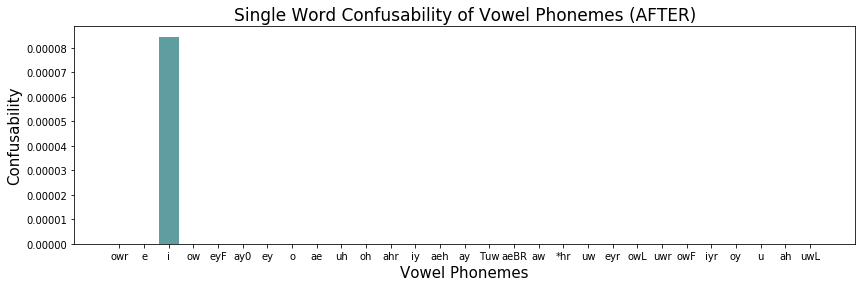

In [174]:
# CONFUSABILITY FULL AFTER

t0 = time.time()

V = ['owr', 'e', 'i', 'ow', 'eyF', 'ay0', 'ey', 'o', 'ae', 'uh', 'oh', 'ahr', 'iy', 'aeh', 'ay', 'Tuw', 'aeBR', 'aw', '*hr', 'uw', 'eyr', 'owL', 'uwr', 'owF', 'iyr', 'oy', 'u', 'ah', 'uwL']
C_full_after = np.zeros((len(V))) # Confusability Matrix
print("V=",V)

# CALCULATING NTOT
Ntot=0
for i in range(len(WP_CMU1)):
    Ntp = float(WP_CMU1[i,2])
    Ntot += Ntp
print("Ntot=", Ntot, time.time()-t0)

# CONFUSABILITY CALCULATION
for i in range(2,3):#(len(V[:])):
    vi = V[i]
    print("vi=",vi)
    vi_1 = ' ' + vi + '.1'
    
    V_altered = [x for x in V if x != vi]
    #V_altered.remove(vi)
    print("vi", vi)
    
    # FIRST SUM
    TPlist_to_sum = []
    for n in range(len(WP_CMU1[:1000])):
        #t = T[n]  #transcription
        trans1 = WP_CMU1[n,0]
        trans2 = WP_CMU1[n,1]
        #print('trans1=',trans1)
        trans_alt = ' '+ trans1
        if vi_1 in (trans_alt):
            d = 1
        else:
            continue
        Ntp = float(WP_CMU1[n,2]) #token count of transcription pair in COCA
        coeff = (Ntp)/Ntot
        
        # SECOND SUM
        Vjlist_to_sum = []
        for j in range(len(V_altered)):
            vj = V_altered[j]
            vj_1 = ' ' + vj + '.1'
            trans_vj = (trans_alt.replace(vi_1, vj_1, 1)).lstrip()
            #print('trans_vj=',trans_vj)
            #print("t_vj is:",t_vj,"t is:",t)
            #print('before ind',time.time()-t0)
            index = [ind for ind in range(len(WP_CMU1)) if WP_CMU1[ind,0]==trans_vj and WP_CMU1[ind,1]==trans2]
            #print('after ind',time.time()-t0)
            #print('index=',index)
            if len(index)!=0:
                #index = [i for i in range(len(T)) if WP_CMU[i]==t_vj]
                Ntp_vj = WP_CMU1[index[0],2].astype(float)#[0] #float
                #print('trans1=',trans1,'trans2=',trans2,'trans_vj=',trans_vj, 'n=',n,'j=',j)
                #print('Ntp_vj=',Ntp_vj)
                #print('tp_vj=',WP_CMU[index[0],0],WP_CMU[index[0],1])
                #print(t,t_vj)#,Nt_vj, type(Nt_vj))
            else:
                Ntp_vj = 0
            inner_term = Ntp_vj/(Ntot)
            #print("inner term", inner_term)
            Vjlist_to_sum.append(inner_term)
        #print('aftervj loop',time.time()-t0)
        SumVj = sum(Vjlist_to_sum)
        term = coeff*SumVj
        TPlist_to_sum.append(term)
    SumTP = sum(TPlist_to_sum)
    C_full_after[i] = SumTP
    
print("Confusability After = ", C_full_after)
print("time=", time.time()-t0)


'''
#SAVING CONFUSABILITY TO FILE 
C_dict_full_after = {}
for i in range(29):
    C_dict_full_after[V[i]]= C_full_after[i]
print(np.array(C_dict_full_after))

text = open("Confus_WP_full_after.txt", "w")
for k, v in C_dict_full_after.items():
    text.write(str(k) + ' : '+str(v)+'\n\n')
text.close()
'''

import matplotlib.pyplot as plt
# INITIAL CONFUSABILITY PLOT
plt.figure(figsize = (14,4))
plt.bar(V,C_full_after, .8, color = 'cadetblue')
plt.title("Single Word Confusability of Vowel Phonemes (AFTER)", fontsize=17)
plt.xlabel('Vowel Phonemes', fontsize=15)
plt.ylabel('Confusability', fontsize=15)#plt.xticks
plt.show()

## Testing Making Array method2 (splitting loop)

In [125]:
#TESTING
import time as time
print(WP[:10])
t0 = time.time()
WP_CMU_list = []
for k in range(len(WP[:1000])):
    #print(k)
    line = WP[k]
    if k%1000==0:
        print(k)
    if line != ' ':
        linelist = line.strip().split(' : ')
        linelist2 = linelist[0].split(',')
        word1 = linelist2[0].upper()
        word2 = linelist2[1].upper()
        count = float(linelist[1])
        info = word1+','+word2+':'+str(count)
            
        if word1 in CMU_dict and word2 in CMU_dict:
            trans_list1 = CMU_dict[word1].split(',')
            trans_list2 = CMU_dict[word2].split(',')
        else:
            continue
        for i in range(len(trans_list1)):
            for j in range(len(trans_list2)):
                
                trans1 = trans_list1[i]
                trans2 = trans_list2[j]
                listij = [trans1,trans2, count, 1, info]
                WP_CMU_list.append(listij)

TP_list = []
for k in range(len(WP_CMU_list)):
    line = WP_CMU_list[k]
    trans1 = line[0]
    trans2 = line[1]
    count = line[2]
    info = line[4]
    
    ind = [idx for idx, element in enumerate(TP_list) if (element[0]==trans1 and element[1]==trans2)]
    if k==0 or len(ind)==0:#(np.array([trans1,trans2]) not in (np.array(WP_CMU_list)[:,0:2])):
        #listij = [trans1,trans2,word1, word2, count, '', '']
        #listij = [trans1,trans2, count, 1, info]
        TP_list.append(line)
    else:
        elem = TP_list[ind[0]]
        if info!=elem[4]: #DEALING WITH ISSUE WITH "KEPT ETC" WHERE CMU HAD IDENTICAL REPEAT ENTRY
            TP_list[ind[0]]=[elem[0],elem[1],elem[2]+count, elem[3]+1, elem[4]+';'+info]

print('TP',len(TP_list), TP_list[0:10]) 
TP_array = np.array(TP_list)
#print(np.shape(TP_array))
print(TP_array[-50:],WP_CMU[-50:])
print((TP_array==WP_CMU).all())
        
'''
                print('before ind', time.time()-t0)
                ind = [idx for idx, element in enumerate(WP_CMU_list) if (element[0]==trans1 and element[1]==trans2)]
                print('after ind', time.time()-t0)
                if k==0 or len(ind)==0:#(np.array([trans1,trans2]) not in (np.array(WP_CMU_list)[:,0:2])):
                    #listij = [trans1,trans2,word1, word2, count, '', '']
                    listij = [trans1,trans2, count, 1, info]
                    WP_CMU_list.append(listij)
                else:
                    #print('\nFOUND REPEAT',trans1,trans2,word1,word2,count,ind,k)
                    #ind = [idx for idx, element in enumerate(WP_CMU_list) if (element[0]==trans1 and element[1]==trans2)]
                    #print(ind, len(ind))
                    elem = WP_CMU_list[ind[0]]
                    #print('FOUND',elem)
                    if info!=elem[4]: #DEALING WITH ISSUE WITH "KEPT ETC" WHERE CMU HAD IDENTICAL REPEAT ENTRY
                        WP_CMU_list[ind[0]]=[elem[0],elem[1],elem[2]+count, elem[3]+1, elem[4]+';'+info]
                    #else:
                        #print('ERROR REPEAT')

print(len(WP_CMU_list),time.time()-t0,WP_CMU_list[:10])

        #list1 = [trans1,trans2,word1, word2, linelist[1], '', '']
        #WP_CMU_list.append(list1)
        #print(list1)
        #print(np.array(list1))
WP_CMU = np.array(WP_CMU_list)
print('len of WP_CMU',len(WP_CMU))
print(WP_CMU[800:1000])
#print(WP_CMU[-5:])
'''
print(time.time() - t0)
#np.savetxt('WP_Trans_count_info_full.txt',WP_CMU, fmt = '%s',delimiter = ',')
                

['afternoon,in : 1328', 'in,late : 7779', 'late,july : 474', 'the,children : 22842', 'children,were : 5057', 'were,angry : 350', 'angry,because : 310', 'because,while : 330', 'while,they : 6175', 'they,worked : 1745']
0
TP 1987 [['ae.2 F T *hr.0 N Tuw.1 N', '@.0 N', 1328.0, 1, 'AFTERNOON,IN:1328.0'], ['ae.2 F T *hr.0 N Tuw.1 N', 'i.1 N', 1328.0, 1, 'AFTERNOON,IN:1328.0'], ['@.0 N', 'L ey.1 T', 7779.0, 1, 'IN,LATE:7779.0'], ['i.1 N', 'L ey.1 T', 7779.0, 1, 'IN,LATE:7779.0'], ['L ey.1 T', 'JH @.0 L ay.1', 474.0, 1, 'LATE,JULY:474.0'], ['L ey.1 T', 'JH uw.2 L ay.1', 474.0, 1, 'LATE,JULY:474.0'], ['DH @.0', 'CH i.1 L D R @.0 N', 22842.0, 1, 'THE,CHILDREN:22842.0'], ['DH uh.1', 'CH i.1 L D R @.0 N', 22842.0, 1, 'THE,CHILDREN:22842.0'], ['DH iy.0', 'CH i.1 L D R @.0 N', 22842.0, 1, 'THE,CHILDREN:22842.0'], ['CH i.1 L D R @.0 N', 'W *hr.0', 5057.0, 1, 'CHILDREN,WERE:5057.0']]
[['HH ae.1 P iy.0 *hr.0' '@.0 F' '106.0' '1' 'HAPPIER,IF:106.0']
 ['HH ae.1 P iy.0 *hr.0' 'i.1 F' '106.0' '1' 'HAPPIER

ValueError: shape mismatch: objects cannot be broadcast to a single shape

## Method 3: multi first (fast, worked on animal). homophones to be dealt with in confusability

In [163]:
print('starting to make array')
# MAKING ARRAY WITH MULTIPLE TRANSCRIPTIONS 
t0 = time.time()
WP_CMU_list = []
for k in range(len(WP[:10000])):#(WP[:-1])):
    if k%10000==0:
        print(k,time.time()-t0)
    #if k%1000000==0:
        #file2 = open('%s.txt' %(k),'w')
        #file2.close()
    line = WP[k]
    #if line != ' ':
    linelist = line.strip().split(' : ')
    linelist2 = linelist[0].split(',')
    word1 = linelist2[0].upper()
    word2 = linelist2[1].upper()
    count = float(linelist[1])
    info = word1+','+word2+':'+str(count)
            
    if word1 in CMU_dict and word2 in CMU_dict:
        trans_list1 = CMU_dict[word1].split(',')
        trans_list2 = CMU_dict[word2].split(',')
    else:
        continue
    for i in range(len(trans_list1)):
        for j in range(len(trans_list2)):
            trans1 = trans_list1[i]
            trans2 = trans_list2[j]
                
            listij = [trans1,trans2, count, 1, info]
            WP_CMU_list.append(listij)

print('done WP_CMU_list') 
print(time.time() - t0)
WP_CMU3 = np.array(WP_CMU_list)
print('len of WP_CMU',len(WP_CMU3))
np.savetxt('WP_CMU_full_test.txt',WP_CMU3, fmt = '%s',delimiter = ',')
#np.savetxt('WP_Trans_count_info_full.txt',WP_CMU, fmt = '%s',delimiter = ',')
print('done making and saving array')



starting to make array
0 0.4762270450592041
done WP_CMU_list
0.6489279270172119
len of WP_CMU 19434
done making and saving array


V= ['owr', 'e', 'i', 'ow', 'eyF', 'ay0', 'ey', 'o', 'ae', 'uh', 'oh', 'ahr', 'iy', 'aeh', 'ay', 'Tuw', 'aeBR', 'aw', '*hr', 'uw', 'eyr', 'owL', 'uwr', 'owF', 'iyr', 'oy', 'u', 'ah', 'uwL']
Ntot= 266538575.0 0.10100603103637695
vi= i
vi i
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indice

indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= [7640]
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []


indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indi

indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indices= []
indi

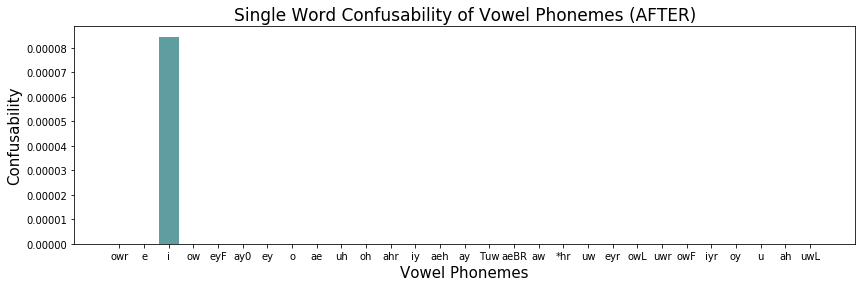

In [203]:
# METHOD 3 CONFUSABILITY FULL AFTER

t0 = time.time()

V = ['owr', 'e', 'i', 'ow', 'eyF', 'ay0', 'ey', 'o', 'ae', 'uh', 'oh', 'ahr', 'iy', 'aeh', 'ay', 'Tuw', 'aeBR', 'aw', '*hr', 'uw', 'eyr', 'owL', 'uwr', 'owF', 'iyr', 'oy', 'u', 'ah', 'uwL']
C_full_after = np.zeros((len(V))) # Confusability Matrix
print("V=",V)

# CALCULATING NTOT
Ntot=0
for i in range(len(WP_CMU3)):
    Nwp = float(WP_CMU3[i,2])
    Ntot += Nwp
print("Ntot=", Ntot, time.time()-t0)

# CONFUSABILITY CALCULATION
for i in range(2,3):#(len(V[:])):
    vi = V[i]
    print("vi=",vi)
    vi_1 = ' ' + vi + '.1'
    
    V_altered = [x for x in V if x != vi]
    #V_altered.remove(vi)
    print("vi", vi)
    
    # FIRST SUM
    TPlist_to_sum = []
    for n in range(len(WP_CMU3[:1000])):
        trans1 = WP_CMU3[n,0]
        trans2 = WP_CMU3[n,1]
        #print('trans1=',trans1)
        trans_alt = ' '+ trans1
        if vi_1 in (trans_alt):
            d = 1
        else:
            continue
        Nwp = float(WP_CMU3[n,2]) #token count of transcription pair in COCA
        coeff = (Nwp)/Ntot
        
        # SECOND SUM
        Vjlist_to_sum = []
        for j in range(len(V_altered)):
            vj = V_altered[j]
            vj_1 = ' ' + vj + '.1'
            trans_vj = (trans_alt.replace(vi_1, vj_1, 1)).lstrip()
            #print('trans_vj=',trans_vj)
            #print("t_vj is:",t_vj,"t is:",t)
            #print('before ind',time.time()-t0)
            indices = np.where(((WP_CMU3)[:,0]==trans_vj)&((WP_CMU3)[:,1]==trans2))[0] # longer for short, faster for long
            #indices = [ind for ind in range(len(WP_CMU3)) if (WP_CMU3[ind,0]==trans_vj and WP_CMU3[ind,1]==trans2)]
            #print('after ind',time.time()-t0)
            print('indices=',indices)
            if len(indices)!=0:
                #index = [i for i in range(len(T)) if WP_CMU[i]==t_vj]
                Nwp_vj_list = (WP_CMU3[indices,2].astype(float))
                Ntp_vj = sum(Nwp_vj_list)
                
                #Ntp_vj = WP_CMU3[index[0],2].astype(float)#[0] #float
                
                #print('trans1=',trans1,'trans2=',trans2,'trans_vj=',trans_vj, 'n=',n,'j=',j)
                #print('Ntp_vj=',Ntp_vj)
                #print('tp_vj=',WP_CMU[index[0],0],WP_CMU[index[0],1])
                #print(t,t_vj)#,Nt_vj, type(Nt_vj))
            else:
                Ntp_vj = 0
            inner_term = Ntp_vj/(Ntot)
            #print("inner term", inner_term)
            Vjlist_to_sum.append(inner_term)
        #print('aftervj loop',time.time()-t0)
        SumVj = sum(Vjlist_to_sum)
        term = coeff*SumVj
        TPlist_to_sum.append(term)
    SumTP = sum(TPlist_to_sum)
    C_full_after[i] = SumTP
    
print("Confusability After = ", C_full_after)
print("time=", time.time()-t0)


'''
#SAVING CONFUSABILITY TO FILE 
C_dict_full_after = {}
for i in range(29):
    C_dict_full_after[V[i]]= C_full_after[i]
print(np.array(C_dict_full_after))

text = open("Confus_WP_full_after.txt", "w")
for k, v in C_dict_full_after.items():
    text.write(str(k) + ' : '+str(v)+'\n\n')
text.close()
'''

import matplotlib.pyplot as plt
# INITIAL CONFUSABILITY PLOT
plt.figure(figsize = (14,4))
plt.bar(V,C_full_after, .8, color = 'cadetblue')
plt.title("Single Word Confusability of Vowel Phonemes (AFTER)", fontsize=17)
plt.xlabel('Vowel Phonemes', fontsize=15)
plt.ylabel('Confusability', fontsize=15)#plt.xticks
plt.show()

In [ ]:
#COPIED FROM ANIMAL FILE (TO BE DELETED/EDITED)
'''
# LOADING WP
import time as time
import numpy as np
WP_txt = open("/home/tdacunha/pnc_project/WPdict_COCA_txt.txt", 'r')
WP = WP_txt.read().split('\n\n')
WP_txt.close()
print("shape of WP", np.shape(WP))

# LOADING CMU DATA AND MAKING DICTIONARY
file = open("/home/tdacunha/pnc_project/cmudict-updated-plotnik.dict", 'r')
#print(file.readlines())
data = file.read().splitlines()
data = np.array(data)
print("shape of cmu",np.shape(data))
pron = []
for i in range(len(data[:])):
    sep = (data[i]).split(' ',1)
    pron.append(sep)
file.close()
print('shape of pron', np.shape(pron))

CMU_dict = {}
count = 0
for line in pron[:]:
    k,v = line[0],line[1]
    if k not in CMU_dict:
        CMU_dict[k] = v
        count +=1
    elif k in CMU_dict:
        CMU_dict[k] = CMU_dict[k]+','+v
        count+=1
print("done cmu_dict",len(CMU_dict))

print('starting to make array')
# MAKING ARRAY WITH MULTIPLE TRANSCRIPTIONS AND SUMMING HOMOPHONES (ITS LIKE T_NT_ARRAY)
t0 = time.time()
WP_CMU_list = []
for k in range(len(WP[:-1])):
    if k%10000==0:
        print(k,time.time()-t0)
    #if k%1000000==0:
        #file2 = open('%s.txt' %(k),'w')
        #file2.close()
    line = WP[k]
    #if line != ' ':
    linelist = line.strip().split(' : ')
    linelist2 = linelist[0].split(',')
    word1 = linelist2[0].upper()
    word2 = linelist2[1].upper()
    count = float(linelist[1])
    info = word1+','+word2+':'+str(count)
            
    if word1 in CMU_dict and word2 in CMU_dict:
        trans_list1 = CMU_dict[word1].split(',')
        trans_list2 = CMU_dict[word2].split(',')
    else:
        continue
    for i in range(len(trans_list1)):
        for j in range(len(trans_list2)):
            trans1 = trans_list1[i]
            trans2 = trans_list2[j]
                
            listij = [trans1,trans2, count, 1, info]
            WP_CMU_list.append(listij)

print('done WP_CMU_list') 
print(time.time() - t0)
WP_CMU = np.array(WP_CMU_list)
print('len of WP_CMU',len(WP_CMU))
np.savetxt('WP_CMU_full.txt',WP_CMU, fmt = '%s',delimiter = ',')
#np.savetxt('WP_Trans_count_info_full.txt',WP_CMU, fmt = '%s',delimiter = ',')
print('done making and saving array')


#CONFUSABILITY

print('starting Confusability', time.time()-t0)
V = ['owr', 'e', 'i', 'ow', 'eyF', 'ay0', 'ey', 'o', 'ae', 'uh', 'oh', 'ahr', 'iy', 'aeh', 'ay', 'Tuw', 'aeBR', 'aw', '*hr', 'uw', 'eyr', 'owL', 'uwr', 'owF', 'iyr', 'oy', 'u', 'ah', 'uwL']
C_full_after = np.zeros((len(V))) # Confusability Matrix
print("V=",V)

# CALCULATING NTOT
Ntot=0
for i in range(len(WP_CMU)):
    Nwp = float(WP_CMU[i,2])
    Ntot += Nwp
print("Ntot=", Ntot, time.time()-t0)

# CONFUSABILITY CALCULATION
for i in range(2,3):#(len(V[:])):
    vi = V[i]
    print("vi=",vi)
    vi_1 = ' ' + vi + '.1'
    
    V_altered = [x for x in V if x != vi]
    #V_altered.remove(vi)
    print("vi", vi)
    
    # FIRST SUM
    TPlist_to_sum = []
    for n in range(len(WP_CMU[:])):
        if n%1==0:
            print(n,time.time()-t0)
        trans1 = WP_CMU[n,0]
        trans2 = WP_CMU[n,1]
        #print('trans1=',trans1)
        trans_alt = ' '+ trans1
        if vi_1 in (trans_alt):
            d = 1
        else:
            continue
        Nwp = float(WP_CMU[n,2]) #token count of transcription pair in COCA
        coeff = (Nwp)/Ntot
        
        # SECOND SUM
        Vjlist_to_sum = []
        for j in range(len(V_altered)):
            vj = V_altered[j]
            vj_1 = ' ' + vj + '.1'
            trans_vj = (trans_alt.replace(vi_1, vj_1, 1)).lstrip()
            
            #indices = [ind for ind in range(len(WP_CMU)) if (WP_CMU[ind,0]==trans_vj and WP_CMU[ind,1]==trans2)]
            indices = np.where(((WP_CMU)[:,0]==trans_vj)&((WP_CMU)[:,1]==trans2))[0] # longer for short, faster for long

            if len(indices)!=0:
                #index = [i for i in range(len(T)) if WP_CMU[i]==t_vj]
                Nwp_vj_list = (WP_CMU[indices,2].astype(float))
                Ntp_vj = sum(Nwp_vj_list)
                
                #Ntp_vj = WP_CMU[index[0],2].astype(float)#[0] #float
                
            else:
                Ntp_vj = 0
            inner_term = Ntp_vj/(Ntot)
            #print("inner term", inner_term)
            Vjlist_to_sum.append(inner_term)
        #print('aftervj loop',time.time()-t0)
        SumVj = sum(Vjlist_to_sum)
        term = coeff*SumVj
        TPlist_to_sum.append(term)
    SumTP = sum(TPlist_to_sum)
    C_full_after[i] = SumTP
    
print("Confusability After = ", C_full_after)
print("time=", time.time()-t0)



#SAVING CONFUSABILITY TO FILE 
C_dict_full_after = {}
for i in range(29):
    C_dict_full_after[V[i]]= C_full_after[i]
print(np.array(C_dict_full_after))

text = open("Confus_WP_full_after.txt", "w")
for k, v in C_dict_full_after.items():
    text.write(str(k) + ' : '+str(v)+'\n\n')
text.close()

print('saved confusability')

import matplotlib.pyplot as plt
# INITIAL CONFUSABILITY PLOT
plt.figure(figsize = (14,4))
plt.bar(V,C_full_after, .8, color = 'cadetblue')
plt.title("Single Word Confusability of Vowel Phonemes (AFTER)", fontsize=17)
plt.xlabel('Vowel Phonemes', fontsize=15)
plt.ylabel('Confusability', fontsize=15)#plt.xticks
plt.show()
print('done')
'''
'''
TP_list = []
for k in range(len(WP_CMU_list)):
    if k%10000==0:
        print(k,time.time()-t0)
    line = WP_CMU_list[k]
    trans1 = line[0]
    trans2 = line[1]
    count = line[2]
    info = line[4]
    
    ind = [idx for idx, element in enumerate(TP_list) if (element[0]==trans1 and element[1]==trans2)]
    if k==0 or len(ind)==0:#(np.array([trans1,trans2]) not in (np.array(WP_CMU_list)[:,0:2])):
        #listij = [trans1,trans2,word1, word2, count, '', '']
        #listij = [trans1,trans2, count, 1, info]
        TP_list.append(line)
    else:
        elem = TP_list[ind[0]]
        if info!=elem[4]: #DEALING WITH ISSUE WITH "KEPT ETC" WHERE CMU HAD IDENTICAL REPEAT ENTRY
            TP_list[ind[0]]=[elem[0],elem[1],elem[2]+count, elem[3]+1, elem[4]+';'+info]

print('TP',len(TP_list), TP_list[0:10]) 
TP_array = np.array(TP_list)
np.savetxt('WP_Trans_info_count_full2.txt',TP_array, fmt = '%s',delimiter = ',')

'''
'''
                ind = [idx for idx, element in enumerate(WP_CMU_list) if (element[0]==trans1 and element[1]==trans2)]
                if k==0 or len(ind)==0:#(np.array([trans1,trans2]) not in (np.array(WP_CMU_list)[:,0:2])):
                    listij = [trans1,trans2, count, 1, info]
                    WP_CMU_list.append(listij)
                else:
                    elem = WP_CMU_list[ind[0]]
                    if info!=elem[4]: #DEALING WITH ISSUE WITH "KEPT ETC" WHERE CMU HAD IDENTICAL REPEAT ENTRY
                        WP_CMU_list[ind[0]]=[elem[0],elem[1],elem[2]+count, elem[3]+1, elem[4]+';'+info]

'''      

'''
print('starting Confusability After')
      
# CONFUSABILITY FULL AFTER

t0 = time.time()

V = ['owr', 'e', 'i', 'ow', 'eyF', 'ay0', 'ey', 'o', 'ae', 'uh', 'oh', 'ahr', 'iy', 'aeh', 'ay', 'Tuw', 'aeBR', 'aw', '*hr', 'uw', 'eyr', 'owL', 'uwr', 'owF', 'iyr', 'oy', 'u', 'ah', 'uwL']
C_full_after = np.zeros((len(V))) # Confusability Matrix
print("V=",V)

# CALCULATING NTOT
Ntot=0
for i in range(len(WP_CMU)):
    Ntp = float(WP_CMU[i,2])
    Ntot += Ntp
print("Ntot=", Ntot)


# CONFUSABILITY CALCULATION
for i in range(len(V[:])):
    vi = V[i]
    print("vi=",vi)
    vi_1 = ' ' + vi + '.1'
    
    V_altered = [x for x in V if x != vi]
    #V_altered.remove(vi)
    print("vi", vi)
    
    # FIRST SUM
    TPlist_to_sum = []
    for n in range(2,3):#(len(WP_CMU[:])):
        #t = T[n]  #transcription
        trans1 = WP_CMU[n,0]
        trans2 = WP_CMU[n,1]
        #print('trans1=',trans1)
        trans_alt = ' '+ trans1
        if vi_1 in (trans_alt):
            d = 1
        else:
            continue
        Ntp = float(WP_CMU[n,2]) #token count of transcription pair in COCA
        coeff = (Ntp)/Ntot
        
        # SECOND SUM
        Vjlist_to_sum = []
        for j in range(len(V_altered)):
            vj = V_altered[j]
            vj_1 = ' ' + vj + '.1'
            trans_vj = (trans_alt.replace(vi_1, vj_1, 1)).lstrip()
            #print('trans_vj=',trans_vj)
            #print("t_vj is:",t_vj,"t is:",t)
            index = [ind for ind in range(len(WP_CMU)) if WP_CMU[ind,0]==trans_vj and WP_CMU[ind,1]==trans2]
            #print('index=',index)
            if len(index)!=0:
                #index = [i for i in range(len(T)) if WP_CMU[i]==t_vj]
                Ntp_vj = WP_CMU[index[0],2].astype(float)#[0] #float
                
            else:
                Ntp_vj = 0
            inner_term = Ntp_vj/(Ntot)
            #print("inner term", inner_term)
            Vjlist_to_sum.append(inner_term)
        
        SumVj = sum(Vjlist_to_sum)
        term = coeff*SumVj
        TPlist_to_sum.append(term)
    SumTP = sum(TPlist_to_sum)
    C_full_after[i] = SumTP
print("Confusability After = ", C_full_after)
print("time=", time.time()-t0)



#SAVING CONFUSABILITY TO FILE 
C_dict_full_after = {}
for i in range(29):
    C_dict_full_after[V[i]]= C_full_after[i]
print(np.array(C_dict_full_after))

text = open("Confus_WP_full_after.txt", "w")
for k, v in C_dict_full_after.items():
    text.write(str(k) + ' : '+str(v)+'\n\n')
text.close()


      
      
print('done saving confusability after, starting confusability before')      
# CONFUSABILITY FULL BEFORE

t0 = time.time()

V = ['owr', 'e', 'i', 'ow', 'eyF', 'ay0', 'ey', 'o', 'ae', 'uh', 'oh', 'ahr', 'iy', 'aeh', 'ay', 'Tuw', 'aeBR', 'aw', '*hr', 'uw', 'eyr', 'owL', 'uwr', 'owF', 'iyr', 'oy', 'u', 'ah', 'uwL']
C_full_before = np.zeros((len(V))) # Confusability Matrix
print("V=",V)

# CALCULATING NTOT
Ntot=0
for i in range(len(WP_CMU)):
    Ntp = float(WP_CMU[i,2])
    Ntot += Ntp
print("Ntot=", Ntot)


# CONFUSABILITY CALCULATION
for i in range(len(V[:])):
    vi = V[i]
    print("vi=",vi)
    vi_1 = ' ' + vi + '.1'
    
    V_altered = [x for x in V if x != vi]
    #V_altered.remove(vi)
    print("vi", vi)
    
    # FIRST SUM
    TPlist_to_sum = []
    for n in range(len(WP_CMU[:])):
        #t = T[n]  #transcription
        trans1 = WP_CMU[n,0]
        trans2 = WP_CMU[n,1]
        #print('trans1=',trans1)
        trans_alt = ' '+ trans2
        if vi_1 in (trans_alt):
            d = 1
        else:
            continue
        Ntp = float(WP_CMU[n,2]) #token count of transcription pair in COCA
        coeff = (Ntp)/Ntot
        
        # SECOND SUM
        Vjlist_to_sum = []
        for j in range(len(V_altered)):
            vj = V_altered[j]
            vj_1 = ' ' + vj + '.1'
            trans_vj = (trans_alt.replace(vi_1, vj_1, 1)).lstrip()
            #print('trans_vj=',trans_vj)
            #print("t_vj is:",t_vj,"t is:",t)
            index = [ind for ind in range(len(WP_CMU)) if WP_CMU[ind,0]==trans1 and WP_CMU[ind,1]==trans_vj] #CHANGE FROM AFTER
            #print('index=',index)
            if len(index)!=0:
                #index = [i for i in range(len(T)) if WP_CMU[i]==t_vj]
                Ntp_vj = WP_CMU[index[0],2].astype(float)#[0] #float
                #print('\ntrans1=',trans1,'trans2=',trans2,'trans_vj=',trans_vj, 'n=',n,'j=',j)
                #print('Ntp_vj=',Ntp_vj,'index=',index[0])
                #print('tp_vj=',WP_CMU[index[0],0],WP_CMU[index[0],1])
                #print(t,t_vj)#,Nt_vj, type(Nt_vj))
            else:
                Ntp_vj = 0
            inner_term = Ntp_vj/(Ntot)
            #print("inner term", inner_term)
            Vjlist_to_sum.append(inner_term)
        
        SumVj = sum(Vjlist_to_sum)
        term = coeff*SumVj
        TPlist_to_sum.append(term)
    SumTP = sum(TPlist_to_sum)
    C_full_before[i] = SumTP
print("Confusability Before = ", C_full_before)
print("time=", time.time()-t0)



#SAVING CONFUSABILITY TO FILE 
C_dict_full_before = {}
for i in range(29):
    C_dict_full_before[V[i]]= C_full_before[i]
print(np.array(C_dict_full_before))

text = open("Confus_WP_full_before.txt", "w")
for k, v in C_dict_full_before.items():
    text.write(str(k) + ' : '+str(v)+'\n\n')
text.close()

'''

## Confusability with Context Before

In [ ]:
'''
# CONFUSABILITY FULL BEFORE
t0 = time.time()

V = ['owr', 'e', 'i', 'ow', 'eyF', 'ay0', 'ey', 'o', 'ae', 'uh', 'oh', 'ahr', 'iy', 'aeh', 'ay', 'Tuw', 'aeBR', 'aw', '*hr', 'uw', 'eyr', 'owL', 'uwr', 'owF', 'iyr', 'oy', 'u', 'ah', 'uwL']
C_full_before = np.zeros((len(V))) # Confusability Matrix
print("V=",V)

# CALCULATING NTOT
Ntot=0
for i in range(len(WP_CMU)):
    Ntp = float(WP_CMU[i,2])
    Ntot += Ntp
print("Ntot=", Ntot)


# CONFUSABILITY CALCULATION
for i in range(2,3):#(len(V[:])):
    vi = V[i]
    print("vi=",vi)
    vi_1 = ' ' + vi + '.1'
    
    V_altered = [x for x in V if x != vi]
    #V_altered.remove(vi)
    print("vi, V_altered:", vi, V_altered)
    
    # FIRST SUM
    TPlist_to_sum = []
    for n in range(len(WP_CMU[:1000])):
        #t = T[n]  #transcription
        trans1 = WP_CMU[n,0]
        trans2 = WP_CMU[n,1]
        #print('trans1=',trans1)
        trans_alt = ' '+ trans2
        if vi_1 in (trans_alt):
            d = 1
        else:
            continue
        Ntp = float(WP_CMU[n,2]) #token count of transcription pair in COCA
        coeff = (Ntp)/Ntot
        
        # SECOND SUM
        Vjlist_to_sum = []
        for j in range(len(V_altered)):
            vj = V_altered[j]
            vj_1 = ' ' + vj + '.1'
            trans_vj = (trans_alt.replace(vi_1, vj_1, 1)).lstrip()
            #print('trans_vj=',trans_vj)
            #print("t_vj is:",t_vj,"t is:",t)
            index = [ind for ind in range(len(WP_CMU)) if WP_CMU[ind,0]==trans1 and WP_CMU[ind,1]==trans_vj] #CHANGE FROM AFTER
            #print('index=',index)
            if len(index)!=0:
                #index = [i for i in range(len(T)) if WP_CMU[i]==t_vj]
                Ntp_vj = WP_CMU[index[0],2].astype(float)#[0] #float
                print('\ntrans1=',trans1,'trans2=',trans2,'trans_vj=',trans_vj, 'n=',n,'j=',j)
                print('Ntp_vj=',Ntp_vj,'index=',index[0])
                print('tp_vj=',WP_CMU[index[0],0],WP_CMU[index[0],1])
                #print(t,t_vj)#,Nt_vj, type(Nt_vj))
            else:
                Ntp_vj = 0
            inner_term = Ntp_vj/(Ntot)
            #print("inner term", inner_term)
            Vjlist_to_sum.append(inner_term)
        
        SumVj = sum(Vjlist_to_sum)
        term = coeff*SumVj
        TPlist_to_sum.append(term)
    SumTP = sum(TPlist_to_sum)
    C_full_before[i] = SumTP
print("Confusability Before = ", C_full_before)
print("time=", time.time()-t0)



#SAVING CONFUSABILITY TO FILE 
C_dict_full_before = {}
for i in range(29):
    C_dict_full_before[V[i]]= C_full_before[i]
print(np.array(C_dict_full_before))

text = open("Confus_WP_full_before.txt", "w")
for k, v in C_dict_full_before.items():
    text.write(str(k) + ' : '+str(v)+'\n\n')
text.close()


import matplotlib.pyplot as plt
# INITIAL CONFUSABILITY PLOT
plt.figure(figsize = (14,4))
plt.bar(V,C_full_before, .8, color = 'cadetblue')
plt.title("Single Word Confusability of Vowel Phonemes (BEFORE)", fontsize=17)
plt.xlabel('Vowel Phonemes', fontsize=15)
plt.ylabel('Confusability', fontsize=15)#plt.xticks
plt.show()
'''

## TESTING ETC

In [205]:
#TESTING
#print(len(WP_CMU_list))
#print(WP_CMU_list[1990])
trans1 = 'K e.1 P T'#'T Tuw.1'
trans2 = 'M ay.1'#'K ow.2 @.0 N S ay.1 D'
t0 = time.time()
ind0 = [idx for idx, element in enumerate(WP_CMU3) if (element[0]==trans1 and element[1]==trans2)]
print('list comp ind',ind0,time.time()-t0)
#ind = np.where(np.array(WP_CMU_list)[:,0:2]==np.array([trans1,trans2]))[0] # longer for short, faster for long

ind = np.where((np.array(WP_CMU_list)[:,0]==trans1)&(np.array(WP_CMU_list)[:,1]==trans2))[0] # longer for short, faster for long

print('np.where ind',ind,time.time()-t0)


arr = np.arange(0,27000000,1)
print(len(arr))

t1 = time.time()
#ind1 = [idx for idx in range(len(WP_CMU3)) if ((WP_CMU3[idx,0]==trans1 and WP_CMU3[idx,1]==trans2))]
ind1 = np.where(arr==356756)[0]
t2 = time.time() #slightly faster
#print(ind)
print(ind1)
#ind = np.where(np.array(WP_CMU_list)[:,0]==trans1)[0]
#print(ind)
#a = 'apples'

t3 = time.time()
ind2 = [idx for idx in range(len(arr)) if ((arr[idx]==356756))]
t4 = time.time()
print(ind2)
#print(t1-t0)
print('np.where',t2-t1)
print('list comp',t4-t3)





list comp ind [1753, 1754] 0.032921791076660156
np.where ind [1753 1754] 0.15795588493347168
27000000
[356756]
[356756]
np.where 0.05440807342529297
list comp 12.17482304573059


In [182]:
#Testing bc this method was inconsistent
arr = np.array(([1,2,3,4],[5,6,7,8]))
print(arr[:,0:2])
if (np.array([1,2]) not in arr[:,0:2]):
    print(True)
else:
    print(False)
    
arr1 = np.array([['ae.2 F T *hr.0 N Tuw.1 N', '@.0 N'],['ae.2 F T *hr.0 N Tuw.1 N', 'i.1 N'],['@.0 N', 'L ey.1 T']])
arr2 = np.array(['i.1 N', 'L ey.1 T'])
if arr2 in arr1:
    print(True)



[[1 2]
 [5 6]]
False
True


[    0 10000 20000 30000 40000]
[-10.   11.5  33.   54.5  76. ]
124272540.0


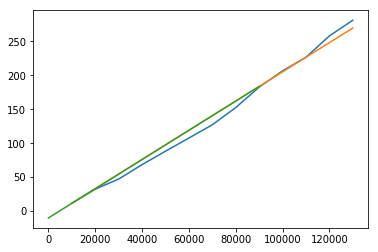

In [131]:
#PLOTTING TIME FOR RUNNING ON ANIMAL
x = [10000,20000,30000,40000,50000,60000,70000,80000,90000,100000,110000,120000,130000]
y = [11.6,43.9-11.6,91.1-43.9,159.5-91.1,247.7-159.5,355.3-247.7,482.4-355.3,634.8-482.4,817.3-634.8,1023.77-817.3,1250.3-1023.77,1508.2-1250.3,1789.2-1508.2]
plt.plot(x,y)
plt.plot(x,.00215*np.array(x).astype(float)-10.)
x1 = np.arange(0,34010000,10000)
y1 = .00215*np.array(x1).astype(float)-10.
plt.plot(x1[:10],y1[:10])
print(x1[:5])
print(y1[:5])
print(sum(y1))
